In [52]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
brupt = pd.read_csv("Bankruptcy.csv")
brupt

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [29]:
# define X and y :

y = brupt["D"] # features
X = brupt.drop(["D", "NO"], axis = 1)   # output

In [32]:
# delacre train_test;

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=24,stratify=y)

In [ ]:
########################## using GaussianNB ##########################

accuracy score is:  0.825


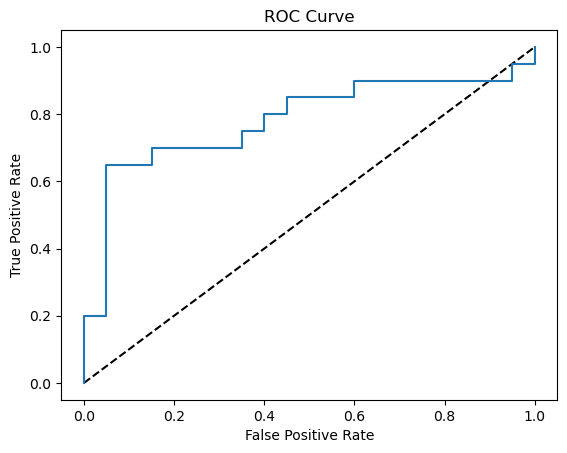

In [74]:
# instantiation;
gaussian = GaussianNB()

# fit the model on gaussian
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)


############## Model Evaluation ##############

print("accuracy score is: ",accuracy_score(y_test, y_pred))

#compute predicted probabiliies : y_pred_prob
y_prob = gaussian.predict_proba(X_test)
y_pred_prob = y_prob[:,1]


# plot roc curve:

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [51]:
################### LogisticRegression #######################

C:\Users\Rohit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score is:  0.775
the roc_auc is:  0.7825


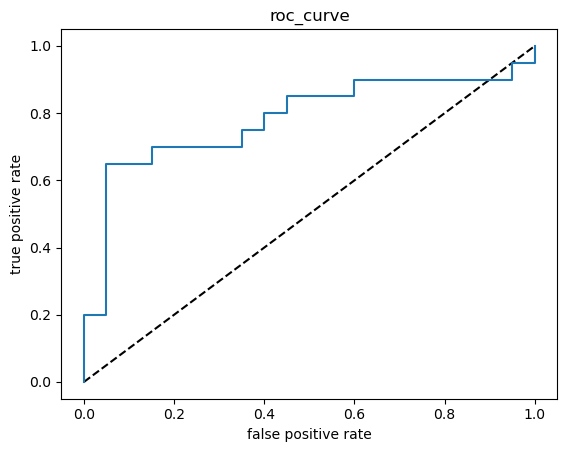

In [73]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

############## Model Evaluation ##############

print("accuracy score is: ",accuracy_score(y_test, y_pred))

#compute predicted probabiliies : y_pred_prob
y_prob = lr.predict_proba(X_test)
y_pred_prob = y_prob[:,1]

# generate roc curve value:
fpr,tpr, threshold = roc_curve(y_test, y_pred_prob)


# plot the curve;

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("roc_curve")

print("the roc_auc is: ",roc_auc_score(y_test, y_pred_prob))